## Introduction

In this project, we will explore and analyze the World Bank dataset. The dataset shows the some details of all countries in the world for 59 years from 1960 to 2018. Each row shows the details of a country for a given year. About 8 categories are used here for analysing each country in the world.



In [169]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [170]:
WB = pd.read_excel("WorldBank Data.xlsx") 

In [171]:
WB.head()

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735


1. Initial inspection

2. Data Cleaning 
   - Do Label Encoding if needed.
   - Drop the column with no usefull information and create new columns if needed.
   - Deals with Missing Values
   - Remove duplicate rows
   - Remove Outliers
   
3. Analyse Questions
   - Which regions has highest and lowest birth rate?
   - Which regions has highest and lowest death rate?
   - Which countries comes under low income group and which comes under high income group?
   - Comparing birth rate and death rate based on income group.
   - Comparing unemployment with GDP per capita and then with population density.
   - Comparing GDP with income group.
   - Correlation Analysis
   - Comparing Internet usage with birth rate and death rate.
   - Internet users in different regions
   - Countries with maximum and minimum Internet usage
   - Comparing incomeGroup with internet users.
   - Relation of internet usage and unemployment with income group.
   - Analysing Life Expectancy through years.
   - Finding the least populates and most populated countries and the find the position of Finland accordingly.

In [172]:
WB.rename(columns={"Country Name":"Country_Name","Country Code":"Country_Code","Birth rate, crude (per 1,000 people)": "Birth_Rate",
                  "Death rate, crude (per 1,000 people)": "Death_Rate","Electric power consumption (kWh per capita)": "EPC","GDP (USD)":"GDP","GDP per capita (USD)":"GDP_Per_Cap",
                  "Individuals using the Internet (% of population)": "Internet_Users","Individuals using the Internet (% of population)":"Internet_Users","Infant mortality rate (per 1,000 live births)":"IMR",
                  "Life expectancy at birth (years)":"Life_Exp","Population density (people per sq. km of land area)":"Pop_Dens",
                  "Unemployment (% of total labor force) (modeled ILO estimate)":"Unemployment"},inplace=True)#renaming columns

In [173]:
WB.head()

,Country_Name,Country_Code,Region,IncomeGroup,Year,Birth_Rate,Death_Rate,EPC,GDP,GDP_Per_Cap,Internet_Users,IMR,Life_Exp,Pop_Dens,Unemployment
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735


In [174]:
WB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 15 columns):
Country_Name      12449 non-null object
Country_Code      12449 non-null object
Region            12449 non-null object
IncomeGroup       12449 non-null object
Year              12449 non-null int64
Birth_Rate        11440 non-null float64
Death_Rate        11416 non-null float64
EPC               5848 non-null float64
GDP               9578 non-null float64
GDP_Per_Cap       9575 non-null float64
Internet_Users    5064 non-null float64
IMR               9984 non-null float64
Life_Exp          11176 non-null float64
Pop_Dens          11845 non-null float64
Unemployment      5208 non-null float64
dtypes: float64(10), int64(1), object(4)
memory usage: 1.4+ MB


In [175]:
WB.isnull().sum()

Country_Name         0
Country_Code         0
Region               0
IncomeGroup          0
Year                 0
Birth_Rate        1009
Death_Rate        1033
EPC               6601
GDP               2871
GDP_Per_Cap       2874
Internet_Users    7385
IMR               2465
Life_Exp          1273
Pop_Dens           604
Unemployment      7241
dtype: int64

In [176]:
print("no: of rows:" ,WB.shape[0])
print("no: of columns" , WB.shape[1])
print ("\n column Names:" , WB.columns.tolist())
print("\n no: of missing values:" , WB.isnull().sum().values.sum())
print('\n Percentage of missing values: ',WB.isnull().sum().values.sum()/WB.size)


no: of rows: 12449
no: of columns 15

 column Names: ['Country_Name', 'Country_Code', 'Region', 'IncomeGroup', 'Year', 'Birth_Rate', 'Death_Rate', 'EPC', 'GDP', 'GDP_Per_Cap', 'Internet_Users', 'IMR', 'Life_Exp', 'Pop_Dens', 'Unemployment']

 no: of missing values: 33356

 Percentage of missing values:  0.17862746673092886


> #### The dataset contains about 18 % of missing values.

In [177]:
WB["Country_Name"].nunique() # To find number of unique countries

211

In [178]:
WB.groupby("Region")["Country_Name"].nunique().sort_values(ascending=False)#Number of countries in each Regions.

Region
Europe & Central Asia         56
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           34
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Country_Name, dtype: int64

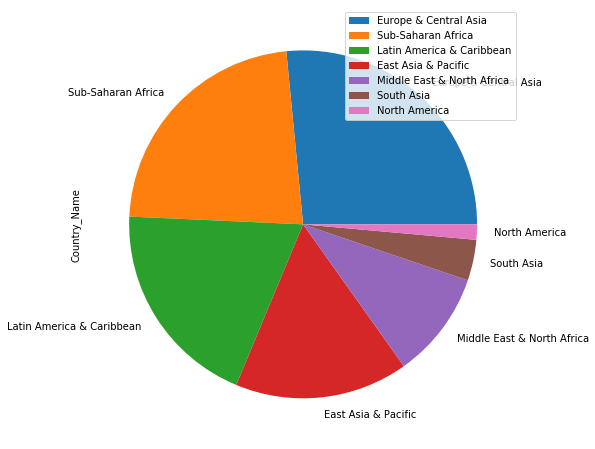

In [226]:
WB.groupby("Region")["Country_Name"].nunique().sort_values(ascending=False).plot(kind="pie", figsize=(10,8))
plt.legend()

### DATA CLEANING

#### For getting better analysis we only take data between years 2000 to 2018. (WB.loc[WB.Year>2000])

In [180]:
WB=WB[WB["Year"].between(2000,2018)]

WB

,Country_Name,Country_Code,Region,IncomeGroup,Year,Birth_Rate,Death_Rate,EPC,GDP,GDP_Per_Cap,Internet_Users,IMR,Life_Exp,Pop_Dens,Unemployment
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.500000,49.5,64.130,55.5960,1.559
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.200000,51.2,63.763,54.1971,1.634
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.260000,53.1,63.377,52.7121,1.679
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.000000,55.1,62.966,51.1148,1.735
5,Afghanistan,AFG,South Asia,Low income,2013,36.670,7.380,NaN,2.056110e+10,637.165,5.900000,57.3,62.525,49.4280,1.725
6,Afghanistan,AFG,South Asia,Low income,2012,37.690,7.645,NaN,2.000160e+10,641.872,5.454550,59.5,62.054,47.7306,1.692
7,Afghanistan,AFG,South Asia,Low income,2011,38.750,7.936,NaN,1.780430e+10,591.162,5.000000,61.9,61.553,46.1315,1.984
8,Afghanistan,AFG,South Asia,Low income,2010,39.829,8.250,NaN,1.585660e+10,543.303,4.000000,64.3,61.028,44.7041,2.275
9,Afghanistan,AFG,South Asia,Low income,2009,40.903,8.584,NaN,1.243910e+10,438.076,3.550000,66.8,60.484,43.4930,2.470


In [295]:
WB.isnull().sum()

Country_Name        0
Country_Code        0
Region              0
IncomeGroup         0
Year                0
Birth_Rate        377
Death_Rate        384
GDP               217
GDP_Per_Cap       217
Internet_Users    382
IMR               399
Life_Exp          460
Pop_Dens           49
Unemployment      475
dtype: int64

After taking data from 2000 to 2018. Our data become more clear to analyze , but still having lot of missing values in Electric power consumption. So we decided to drop it.

In [182]:
WB=WB.drop(["EPC"], axis=1)
WB

,Country_Name,Country_Code,Region,IncomeGroup,Year,Birth_Rate,Death_Rate,GDP,GDP_Per_Cap,Internet_Users,IMR,Life_Exp,Pop_Dens,Unemployment
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,2.019180e+10,556.302,13.500000,49.5,64.130,55.5960,1.559
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,1.936260e+10,547.228,11.200000,51.2,63.763,54.1971,1.634
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,1.990710e+10,578.466,8.260000,53.1,63.377,52.7121,1.679
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,2.048490e+10,613.856,7.000000,55.1,62.966,51.1148,1.735
5,Afghanistan,AFG,South Asia,Low income,2013,36.670,7.380,2.056110e+10,637.165,5.900000,57.3,62.525,49.4280,1.725
6,Afghanistan,AFG,South Asia,Low income,2012,37.690,7.645,2.000160e+10,641.872,5.454550,59.5,62.054,47.7306,1.692
7,Afghanistan,AFG,South Asia,Low income,2011,38.750,7.936,1.780430e+10,591.162,5.000000,61.9,61.553,46.1315,1.984
8,Afghanistan,AFG,South Asia,Low income,2010,39.829,8.250,1.585660e+10,543.303,4.000000,64.3,61.028,44.7041,2.275
9,Afghanistan,AFG,South Asia,Low income,2009,40.903,8.584,1.243910e+10,438.076,3.550000,66.8,60.484,43.4930,2.470


In [183]:
print("no: of rows:" ,WB.shape[0])
print("no: of columns" , WB.shape[1])
print("\n no: of missing values:" , WB.isnull().sum().values.sum())
print('\n Percentage of missing values: ',WB.isnull().sum().values.sum()/WB.size)


no: of rows: 4009
no: of columns 14

 no: of missing values: 2960

 Percentage of missing values:  0.05273848127427574


> #### After dealing with missing values and considering only years between 2000 and 2018 , now we have 4009 rows and only about 5% of missing values

#### Analyzing which regions has highest and lowest birth rate.

Text(0.5, 1.0, 'Region wise Birth_rate')

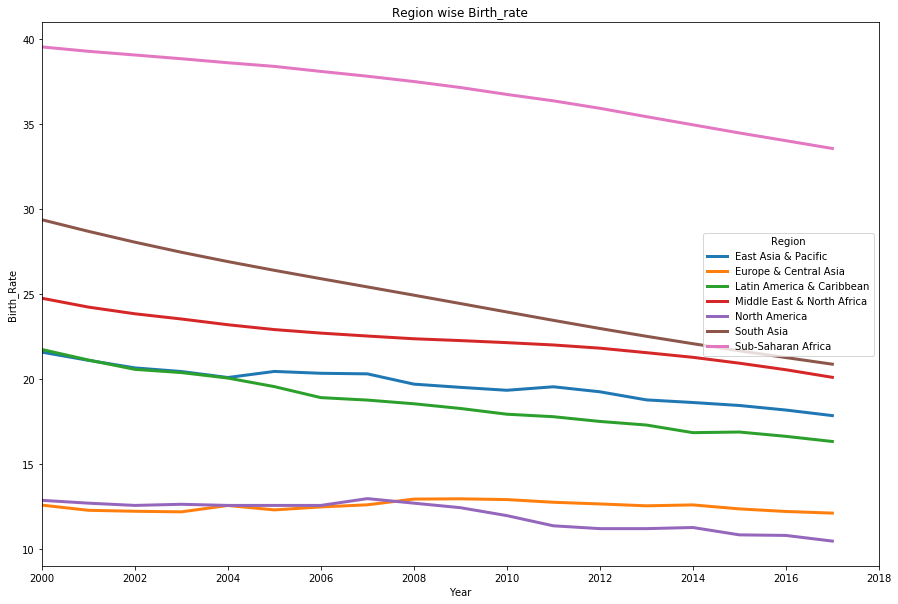

In [213]:
WB.groupby(["Region", "Year"])["Birth_Rate"].mean().unstack(level=0).plot(kind="line",figsize=(15,10),lw=3)
plt.ylabel('Birth_Rate')
plt.title('Region wise Birth_rate')

> #### Analysis shows that Europe and asian countries have almost same birth rate in past 18 years. But in other regions birth rate is decreasing.

#### Analyzing which regions has highest and lowest death rate.

Text(0.5, 1.0, 'Region wise Death_rate')

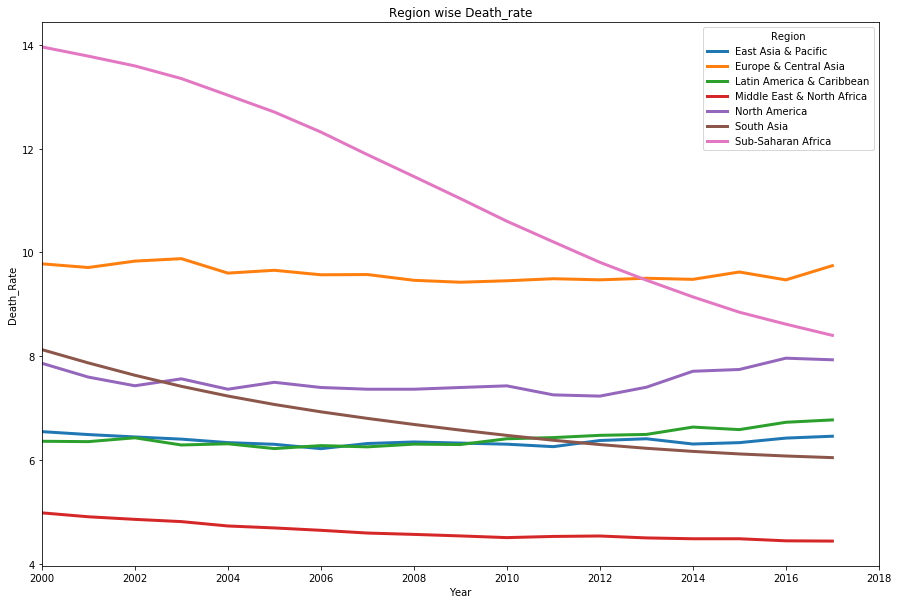

In [214]:
WB.groupby(["Region", "Year"])["Death_Rate"].mean().unstack(level=0).plot(kind="line",figsize=(15,10),lw=3)
plt.ylabel('Death_Rate')
plt.title('Region wise Death_rate')

> #### Analysis shows that Europe and central asian countries have almost same Death rate in past 18 years. But in other regions birth rate is decreasing. In sub saharan african countries there is a high decrease in death rate.

In [186]:
WB[WB["IncomeGroup"]=="Low income"]["Country_Name"].unique() # to find countries in low income group

array(['Afghanistan', 'Benin', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Eritrea', 'Ethiopia', 'Gambia, The', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mozambique',
       'Nepal', 'Niger', 'North Korea', 'Rwanda', 'Sierra Leone',
       'Somalia', 'South Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zimbabwe'],
      dtype=object)

In [187]:
WB[WB["IncomeGroup"]=="High income: OECD"]["Country_Name"].unique() # to find countries in high income group

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Korea, Rep.', 'Luxembourg', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom',
       'United States'], dtype=object)

### Comparing birth rate and death rate  based on income group.

Text(0.5, 1.0, 'Birth and Death rate Vs Income Group')

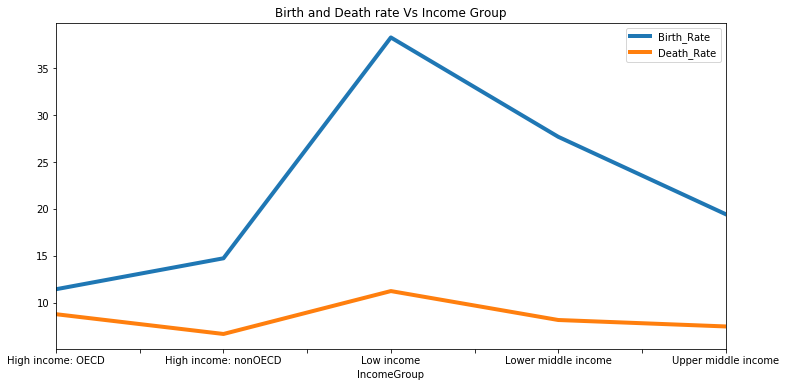

In [215]:
WB.groupby("IncomeGroup")[["Birth_Rate","Death_Rate"]].mean().plot(figsize=(12,6),lw=4)
# From the graph we can see that low income group has high birth and death rate
plt.title('Birth and Death rate Vs Income Group')

> #### Analysis shows that rich countries have fewer kids (low birth rate) than low income ones and low income countries have high birth rate and death rate. This can be becuase of less awareness and low income.

#### Comparing unemployment with GDP per capita and then with population density.

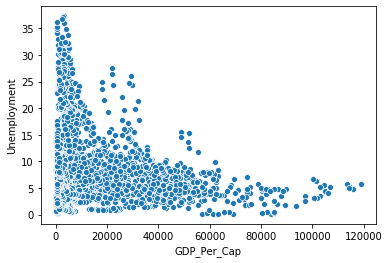

In [264]:
sns.scatterplot(x= WB["GDP_Per_Cap"], y= WB.Unemployment)


Text(0, 0.5, 'GDP')

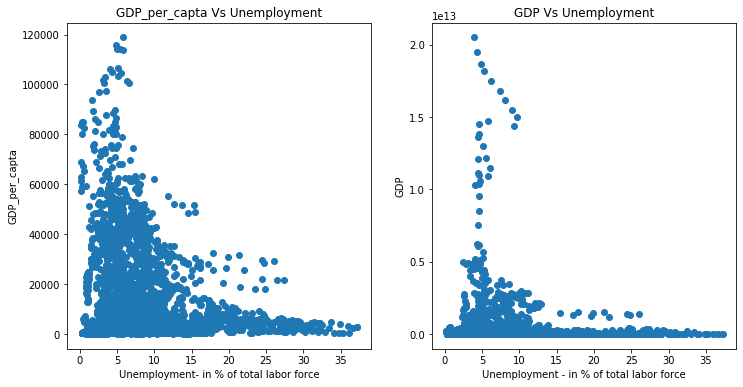

In [253]:
fig,axes = plt.subplots(1,2,figsize=(12,6))
axes[0].scatter(x=WB["Unemployment"], y=WB["GDP_Per_Cap"])
axes[0].set_title('GDP_per_capta Vs Unemployment')
axes[0].set_xlabel('Unemployment- in % of total labor force')
axes[0].set_ylabel('GDP_per_capta')
axes[1].scatter(x=WB["Unemployment"], y=WB["GDP"])
#axes[1].set_yscale('log')
axes[1].set_title('GDP Vs Unemployment')
axes[1].set_xlabel('Unemployment - in % of total labor force')
axes[1].set_ylabel('GDP')

> #### Results shows that unemployment and population density are inversely proportional

Text(0.5, 1.0, 'Population Density Vs GDP Per Capita')

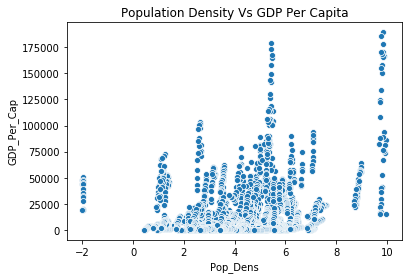

In [329]:
sns.scatterplot(x= np.log(WB["Pop_Dens"]), y= WB.GDP_Per_Cap)
plt.title('Population Density Vs GDP Per Capita')

Text(0.5, 1.0, 'Population Density Vs Unemployment')

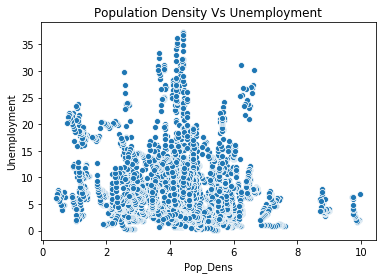

In [330]:
sns.scatterplot(x= np.log(WB["Pop_Dens"]), y= WB.Unemployment)
plt.title('Population Density Vs Unemployment')

> #### The above results shows that there is no direct relation between unemployment and population density or GDP per capita and population density.

#### Comparing GDP with income group.

Text(0.5, 1.0, 'GDP Vs Income Group')

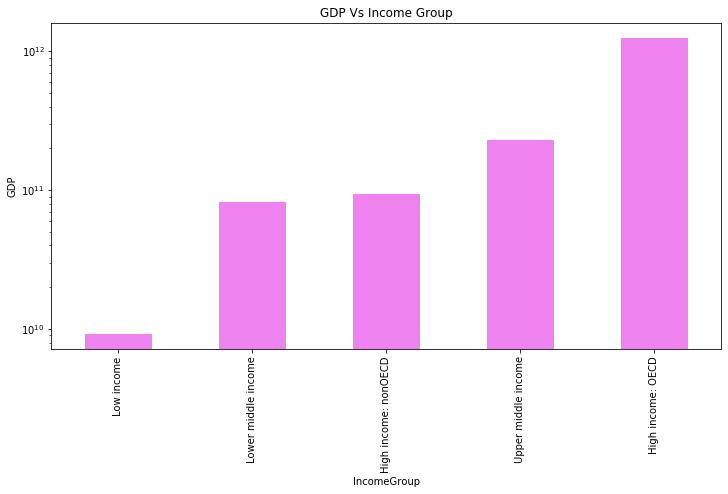

In [266]:
WB.groupby("IncomeGroup")["GDP"].mean().sort_values().plot(kind="bar",figsize=(12,6),logy = True,color='violet')
plt.ylabel('GDP')
plt.title('GDP Vs Income Group')

> #### Results shows that GDP is growing as income grows.

#### Correlation Analysis

In [192]:
CC=WB.corr() # to find correlation matrix
CC

,Year,Birth_Rate,Death_Rate,GDP,GDP_Per_Cap,Internet_Users,IMR,Life_Exp,Pop_Dens,Unemployment
Year,1.000000,-0.100039,-0.144622,0.065711,0.114692,0.511031,-0.198052,0.189891,0.009699,-0.065755
Birth_Rate,-0.100039,1.000000,0.287457,-0.187684,-0.504284,-0.673741,0.867870,-0.858622,-0.152973,-0.108875
Death_Rate,-0.144622,0.287457,1.000000,-0.008226,-0.180908,-0.195432,0.511367,-0.593354,-0.146442,0.184745
GDP,0.065711,-0.187684,-0.008226,1.000000,0.184772,0.231152,-0.171064,0.195685,-0.023299,-0.068557
GDP_Per_Cap,0.114692,-0.504284,-0.180908,0.184772,1.000000,0.679417,-0.469317,0.569315,0.398968,-0.138075
Internet_Users,0.511031,-0.673741,-0.195432,0.231152,0.679417,1.000000,-0.662535,0.708630,0.159223,-0.020029
IMR,-0.198052,0.867870,0.511367,-0.171064,-0.469317,-0.662535,1.000000,-0.929193,-0.113808,-0.051404
Life_Exp,0.189891,-0.858622,-0.593354,0.195685,0.569315,0.708630,-0.929193,1.000000,0.182379,-0.036161
Pop_Dens,0.009699,-0.152973,-0.146442,-0.023299,0.398968,0.159223,-0.113808,0.182379,1.000000,-0.094742
Unemployment,-0.065755,-0.108875,0.184745,-0.068557,-0.138075,-0.020029,-0.051404,-0.036161,-0.094742,1.000000


(10.5, -0.5)

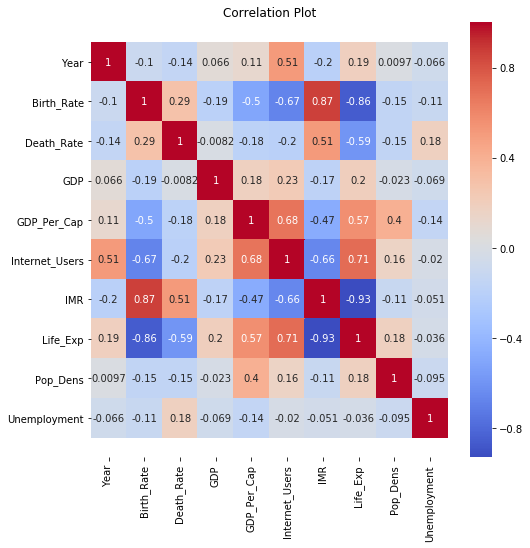

In [193]:
plt.figure(figsize=(8,8))
ax=sns.heatmap(CC,annot=True,cmap="coolwarm")
plt.title("Correlation Plot")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Comparing Internet usage with birth rate and death rate.

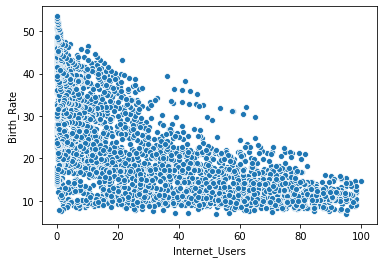

In [194]:
sns.scatterplot(x=WB['Internet_Users'],y=WB['Birth_Rate'])

> #### Analysis shows that as internet usage increases birth rate decreases

Text(0.5, 1.0, 'Internet users Vs Life_Exp')

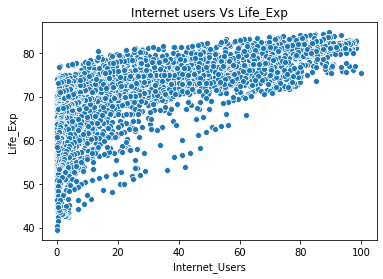

In [195]:
sns.scatterplot(x=WB['Internet_Users'],y=WB['Life_Exp'])
plt.title('Internet users Vs Life_Exp')

> #### Result shows that internet usage has strong influence on life expetancy of a person. The use of internet increases the life expectancy. This can be because internet usage is much more in countries with higher income as shown below.

#### Internet users in different regions; Countries with maximum and minimum Internet usage

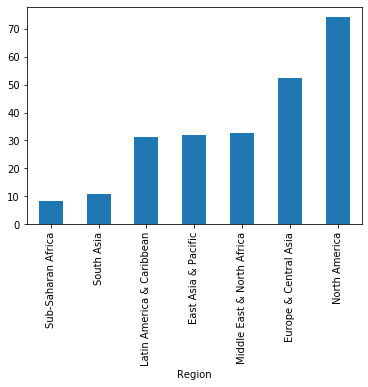

In [267]:
WB.groupby('Region')['Internet_Users'].mean().sort_values().plot(kind='bar')

In [296]:
WB.groupby('Country_Name')['Internet_Users'].mean().sort_values(ascending =False)[:10]

Country_Name
Iceland        87.576358
Norway         86.243221
Sweden         84.095258
Denmark        83.121137
Netherlands    81.355532
Korea, Rep.    78.392979
Finland        77.867542
Bermuda        76.993911
Luxembourg     76.856737
Switzerland    76.351828
Name: Internet_Users, dtype: float64

In [278]:
WB.groupby('Country_Name')['Internet_Users'].mean().sort_values()[:10]

Country_Name
North Korea                 0.000000
Eritrea                     0.679384
Somalia                     1.096949
Burundi                     1.285354
Niger                       1.601708
Congo, Dem. Rep.            1.654179
Central African Republic    1.707214
Chad                        1.752582
Madagascar                  2.116674
Guinea-Bissau               2.289259
Name: Internet_Users, dtype: float64

- ### Note: North Korea's internet usage is ZERO
            https://en.wikipedia.org/wiki/Internet_in_North_Korea

#### Comparing incomeGroup with internet users

Text(0.5, 1.0, 'Internet Usage Vs Income Groups')

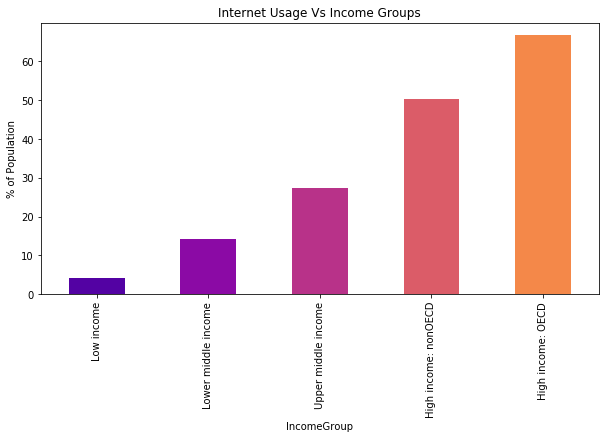

In [249]:
#WB.groupby("IncomeGroup")["Internet_Users"].mean().sort_values().plot(kind="bar",figsize=(12,6),logy = True)

WB.groupby('IncomeGroup')['Internet_Users'].mean().sort_values().plot(kind='bar',figsize=(10,5),color=sns.color_palette("plasma"))
plt.ylabel('% of Population')
plt.title('Internet Usage Vs Income Groups')

#### Results shows that Internet usage is high in high income groups.

In [197]:
WB[WB["IncomeGroup"]=="High income: OECD"].sort_values(by="GDP",ascending=False) # Countries in high income group

,Country_Name,Country_Code,Region,IncomeGroup,Year,Birth_Rate,Death_Rate,GDP,GDP_Per_Cap,Internet_Users,IMR,Life_Exp,Pop_Dens,Unemployment
11800,United States,USA,North America,High income: OECD,2018,NaN,NaN,2.050000e+13,62641.00,NaN,5.6,NaN,35.76610,3.933
11801,United States,USA,North America,High income: OECD,2017,11.8,8.500,1.950000e+13,59927.90,87.2661,5.7,78.5390,35.54520,4.355
11802,United States,USA,North America,High income: OECD,2016,12.2,8.493,1.870000e+13,57904.20,85.5444,5.8,78.5390,35.31830,4.869
11803,United States,USA,North America,High income: OECD,2015,12.4,8.440,1.820000e+13,56803.50,74.5542,5.8,78.6902,35.06370,5.280
11804,United States,USA,North America,High income: OECD,2014,12.5,8.237,1.750000e+13,55033.00,73.0000,5.9,78.8415,34.80610,6.168
11805,United States,USA,North America,High income: OECD,2013,12.4,8.215,1.680000e+13,53106.90,71.4000,6.0,78.7415,34.55160,7.375
11806,United States,USA,North America,High income: OECD,2012,12.6,8.102,1.620000e+13,51603.50,74.7000,6.0,78.7415,34.31290,8.069
11807,United States,USA,North America,High income: OECD,2011,12.7,8.073,1.550000e+13,49883.10,69.7295,6.1,78.6415,34.06210,8.949
11808,United States,USA,North America,High income: OECD,2010,13.0,7.995,1.500000e+13,48466.80,71.6900,6.2,78.5415,33.81570,9.633
11810,United States,USA,North America,High income: OECD,2008,14.0,8.100,1.470000e+13,48382.60,74.0000,6.5,78.0390,33.24370,5.784


#### Relation of internet usage and unemployment with income group.

Text(0.5, 1.0, 'Income Group vs Internet usage and Unemployment')

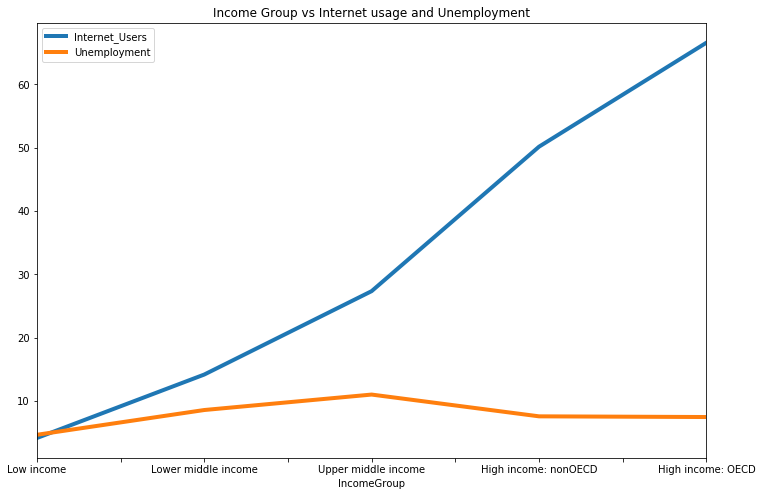

In [228]:
WB.groupby(["IncomeGroup"])[["Internet_Users", "Unemployment"]].mean().sort_values(by="Internet_Users").plot(figsize=(12,8),lw=4)
plt.title('Income Group vs Internet usage and Unemployment')

> #### Results shows that rich countries have more internet users and low unemployment rate. From this we can conclude that as internet usage increases more people get jobs and so unemployment reduces.

#### Finding countries with high Life Expectancy 

In [200]:
WB.nlargest(5 ,'Life_Exp')

,Country_Name,Country_Code,Region,IncomeGroup,Year,Birth_Rate,Death_Rate,GDP,GDP_Per_Cap,Internet_Users,IMR,Life_Exp,Pop_Dens,Unemployment
9328,San Marino,SMR,Europe & Central Asia,High income: nonOECD,2012,9.7,7.1,1.800080e+09,56068.4,NaN,2.2,85.4171,535.083,NaN
4957,"Hong Kong SAR, China",HKG,East Asia & Pacific,High income: nonOECD,2017,7.7,6.3,3.420000e+11,46220.5,89.4159,NaN,84.6805,7039.710,3.09
4959,"Hong Kong SAR, China",HKG,East Asia & Pacific,High income: nonOECD,2015,8.2,6.3,3.090000e+11,42431.9,84.9484,NaN,84.2780,6944.100,3.32
4958,"Hong Kong SAR, China",HKG,East Asia & Pacific,High income: nonOECD,2016,8.3,6.4,3.210000e+11,43734.2,87.4794,NaN,84.2268,6987.240,3.39
5665,Japan,JPN,East Asia & Pacific,High income: OECD,2017,7.6,10.8,4.860000e+12,38332.0,84.5881,1.9,84.0998,347.778,2.80


> #### Life Expectancy is more for rich countries in europe and central asian regions.

#### Analysing Life Expectancy through years.

Text(0.5, 1.0, ' Life Expectancy over the years')

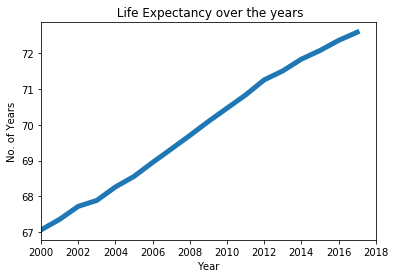

In [242]:
WB.groupby('Year')['Life_Exp'].mean().sort_values().plot(kind='line',lw=5)
plt.ylabel('No. of Years')
plt.title(' Life Expectancy over the years')

> #### We can see Life Expectancy is increasing as years going by.

Text(0.5, 1.0, 'Infant Morality over the years')

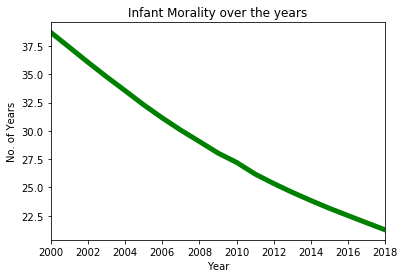

In [234]:
WB.groupby('Year')['IMR'].mean().sort_values().plot(kind='line',color='g',lw=5)
plt.ylabel('Per Thousand')
plt.title('Infant Morality over the years')

In [202]:
WB.head(3)

,Country_Name,Country_Code,Region,IncomeGroup,Year,Birth_Rate,Death_Rate,GDP,GDP_Per_Cap,Internet_Users,IMR,Life_Exp,Pop_Dens,Unemployment
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,2.019180e+10,556.302,13.5,49.5,64.130,55.5960,1.559
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,1.936260e+10,547.228,11.2,51.2,63.763,54.1971,1.634


#### Top 10 counties with very less population density

In [203]:
WB.groupby('Country_Name')['Pop_Dens'].mean().sort_values()[:10]

Country_Name
Greenland     0.137670
Mongolia      1.751017
Namibia       2.544242
Australia     2.838502
Iceland       3.126623
Mauritania    3.338503
Suriname      3.354992
Botswana      3.420851
Libya         3.442854
Canada        3.705487
Name: Pop_Dens, dtype: float64


> #### Greenland is least densely populated.
Greenland is the least densely populated territory in the world with 0.14 people per sq. km. (From Google)

 #### Top 10 counties with very high population density

In [204]:
WB.groupby('Country_Name')['Pop_Dens'].mean().sort_values(ascending=False)[:10]

Country_Name
Macao SAR, China             18483.363158
Monaco                       17589.750000
Singapore                     6981.099474
Hong Kong SAR, China          6680.692105
Bahrain                       1475.453158
Malta                         1312.487368
Maldives                      1243.780000
Bermuda                       1190.107368
Bangladesh                    1118.068737
Sint Maarten (Dutch part)     1013.254722
Name: Pop_Dens, dtype: float64

> #### Macao of China is the most densely populated country.

In [207]:
WB1=WB.groupby('Country_Name')['Pop_Dens'].mean().sort_values(ascending=False)
WB1 = WB1.reset_index()
WB1[WB1['Country_Name'] == 'Finland']

,Country_Name,Pop_Dens
177,Finland,17.569637


> #### The country FINLAND has a very low population density of 17  people per sq. km of land area, which ranks 176th in the world and makes Finland one of the most sparsely populated countries of the European Union.
